Лабораторная работа №3

Сахаровой Дарьи

Вариант - 17

ФО - Южный ФО

alfa - 0.015

М - 5000

(а, sigma) - (-3,4)

n - 95

Закон Y - Логистическое с параметрами масштаба 9 и сдвига 4

In [56]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import norm
###  see 

### https://docs.scipy.org/doc/scipy/reference/stats.html
# смотреть Hypothesis Tests and related functions

1 - НАХОДИМ ДАННЫЕ

In [57]:
SOUTH_FO = pd.read_excel("tmp.xlsx")
print('Число врачей на 10000 населения в Южном ФО\n\n')
print(SOUTH_FO)



Число врачей на 10000 населения в Южном ФО


                    РЕГИОН  2005  2010  2015  2019  2020  2021
0  Южный федеральный округ  43.6  44.4  41.8  43.3  44.6  44.8
1        Республика Адыгея  37.6  37.9  37.9  39.0  39.4  39.5
2      Республика Калмыкия  48.7  46.7  53.3  50.2  49.9  49.4
3          Республика Крым   NaN   NaN  42.8  44.3  45.5  47.8
4       Краснодарский край  42.3  41.9  40.0  43.3  45.2  45.2
5     Астраханская область  65.7  68.2  60.8  61.2  62.1  59.4
6    Волгоградская область  48.1  50.5  43.9  45.3  45.7  45.0
7       Ростовская область  37.5  38.6  37.7  37.1  38.7  39.1
8           г. Севастополь   NaN   NaN  41.6  45.4  44.6  47.6


2 - ВИЗУАЛИЗИРУЕМ ДАННЫЕ

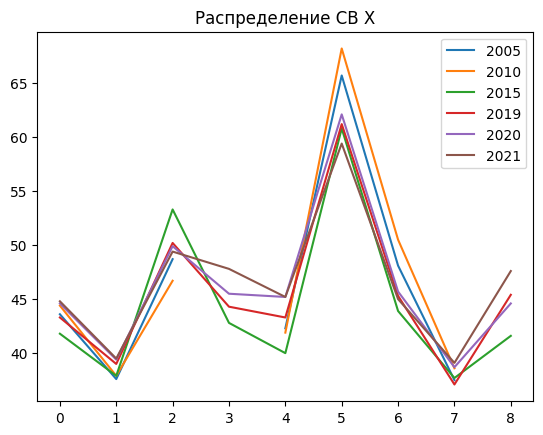

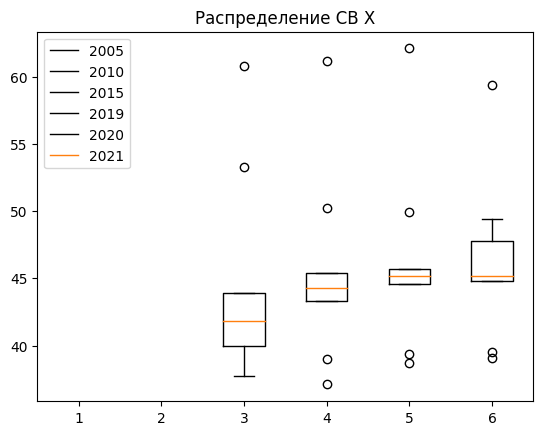

In [58]:
# Построение графика и ящика с усами
plt.plot(SOUTH_FO[2005])
plt.plot(SOUTH_FO[2010])
plt.plot(SOUTH_FO[2015])
plt.plot(SOUTH_FO[2019])
plt.plot(SOUTH_FO[2020])
plt.plot(SOUTH_FO[2021])
plt.legend(["2005", "2010", "2015", "2019", "2020", "2021"])
plt.title('Распределение СВ X')
plt.show()

plt.boxplot([SOUTH_FO[2005], SOUTH_FO[2010], SOUTH_FO[2015], SOUTH_FO[2019], SOUTH_FO[2020], SOUTH_FO[2021]])
plt.title("Распределение СВ X")
plt.legend(["2005", "2010", "2015", "2019", "2020", "2021"])
plt.show()

3 - ОПИСАТЕЛЬНАЯ СТАТИСТИКА

In [59]:
# Нахождение статистики
del SOUTH_FO['РЕГИОН']
print()
print('Статистика для св X')
for column in SOUTH_FO:
    print()
    print(column)
    print('Минимальное значение = ', min(SOUTH_FO[column]))
    print('Максимальное значение = ', max(SOUTH_FO[column]))
    print('Среднее = ', SOUTH_FO[column].mean())
    print('СКО = ', SOUTH_FO[column].std())
    print('Медиана = ', SOUTH_FO[column].median())
    print('Квантиль уровня 0.25 = ', SOUTH_FO[column].quantile(0.25))
    print('Квантиль уровня 0.5 = ', SOUTH_FO[column].quantile(0.5))
    print('Квантиль уровня 0.75 = ', SOUTH_FO[column].quantile(0.75))


Статистика для св X

2005
Минимальное значение =  37.5
Максимальное значение =  65.7
Среднее =  46.214285714285715
СКО =  9.675816687568476
Медиана =  43.6
Квантиль уровня 0.25 =  39.95
Квантиль уровня 0.5 =  43.6
Квантиль уровня 0.75 =  48.400000000000006

2010
Минимальное значение =  37.9
Максимальное значение =  68.2
Среднее =  46.885714285714286
СКО =  10.390930110987592
Медиана =  44.4
Квантиль уровня 0.25 =  40.25
Квантиль уровня 0.5 =  44.4
Квантиль уровня 0.75 =  48.6

2015
Минимальное значение =  37.7
Максимальное значение =  60.8
Среднее =  44.42222222222222
СКО =  7.681760504236281
Медиана =  41.8
Квантиль уровня 0.25 =  40.0
Квантиль уровня 0.5 =  41.8
Квантиль уровня 0.75 =  43.9

2019
Минимальное значение =  37.1
Максимальное значение =  61.2
Среднее =  45.455555555555556
СКО =  7.0048395968628565
Медиана =  44.3
Квантиль уровня 0.25 =  43.3
Квантиль уровня 0.5 =  44.3
Квантиль уровня 0.75 =  45.4

2020
Минимальное значение =  38.7
Максимальное значение =  62.1
Среднее =

4 - ТЕСТ ШАПИРО-УИЛКА

In [60]:
# Проверка с помощью теста Шапиро-Уилка (H0 ~ N(a,std^2))
ALPHA = 0.015

# Замена всех значений NaN на 0
# SOUTH_FO = SOUTH_FO.fillna(0)
# print('\n\n')
# print(SOUTH_FO)

# Тест Шапиро-Уилка является более мощным и точным, 
#  лучше применять его в случае, если данные имеют небольшой объем (обычно до 2000 наблюдений). 
# Тест Шапиро-Уилка также более чувствителен к отклонениям от нормальности в хвостах распределения.


print()
print('Проверка гипотезы H0 с помощью теста Шапиро-Уилка (H0 ~ N(a,std^2)):')
for column in SOUTH_FO:
    result = stats.shapiro(SOUTH_FO[column])
    print()
    print(column)
    print(result)
    if result[1] > ALPHA:
        print('Выборка распределена по нормальному закону => ПРИНИМАЕМ H0')
    else:
        print('Выборка не распределена по норм. закону => ОТВЕРГАЕМ H0')


Проверка гипотезы H0 с помощью теста Шапиро-Уилка (H0 ~ N(a,std^2)):

2005
ShapiroResult(statistic=nan, pvalue=1.0)
Выборка распределена по нормальному закону => ПРИНИМАЕМ H0

2010
ShapiroResult(statistic=nan, pvalue=1.0)
Выборка распределена по нормальному закону => ПРИНИМАЕМ H0

2015
ShapiroResult(statistic=0.8037611246109009, pvalue=0.022541826590895653)
Выборка распределена по нормальному закону => ПРИНИМАЕМ H0

2019
ShapiroResult(statistic=0.864843487739563, pvalue=0.10820738226175308)
Выборка распределена по нормальному закону => ПРИНИМАЕМ H0

2020
ShapiroResult(statistic=0.8132715225219727, pvalue=0.028915490955114365)
Выборка распределена по нормальному закону => ПРИНИМАЕМ H0

2021
ShapiroResult(statistic=0.8883335590362549, pvalue=0.19179393351078033)
Выборка распределена по нормальному закону => ПРИНИМАЕМ H0


5 - ТЕСТЫ БАРТЛЕТТА И ЛЕВЕНА 

In [61]:
# Проверка гипотезы о равенстве дисперсий для различных годов

#   БЕРЕМ ГОДА КРОМЕ ПЕРВЫХ ДВУХ    !!!!!!!!!!

# Тест Бартлетта основан на сравнении дисперсий между группами 
# для данных с нормальным распределением. 
# является более мощным и точным, чем тест Левена, но он более чувствителен к нарушениям нормальности.

# Тест Левена также используется для проверки дисперсий, но он более устойчив к нарушениям нормальности 
# в данных. может быть применен для данных с любым типом распределения. 

print('\nТест Бартлетта')
# result = stats.bartlett(SOUTH_FO[2005], SOUTH_FO[2010], SOUTH_FO[2015], SOUTH_FO[2019], SOUTH_FO[2020], SOUTH_FO[2021])
result = stats.bartlett(SOUTH_FO[2015], SOUTH_FO[2019], SOUTH_FO[2020], SOUTH_FO[2021])
print(result)
if result[1] > ALPHA:
    print('Дисперсии равны => ПРИНИМАЕМ H0')
else:
    print('Дисперсии не равны => ОТВЕРГАЕМ H0')
    

print('\nТест Левена')
result = stats.levene(SOUTH_FO[2015], SOUTH_FO[2019], SOUTH_FO[2020], SOUTH_FO[2021])
# result = stats.levene(SOUTH_FO[2005], SOUTH_FO[2010], SOUTH_FO[2015], SOUTH_FO[2019], SOUTH_FO[2020], SOUTH_FO[2021])
print(result)
if result[1] > ALPHA:
    print('Дисперсии равны => ПРИНИМАЕМ H0')
else:
    print('Дисперсии не равны => ОТВЕРГАЕМ H0')


Тест Бартлетта
BartlettResult(statistic=0.4619775953022795, pvalue=0.9271617408492009)
Дисперсии равны => ПРИНИМАЕМ H0

Тест Левена
LeveneResult(statistic=0.05053918228477466, pvalue=0.9847086014580364)
Дисперсии равны => ПРИНИМАЕМ H0


6 - ГИПОТЕЗА О СРЕДНЕМ ЗНАЧЕНИИ (t-тест)

In [63]:
# Проверка гипотезы, что Xср значимо больше общероссийского значения показателя X для различных годов

# Гипотеза о равенстве средних 
# t-тест для двух выборок предполагает, что средние значения двух генеральных совокупностей равны.

print()
rus_stat = pd.read_excel("CHISLO_DOCTORS.xlsx", sheet_name='ITOG')
print('Общероссийское значение показателя X для различных годов')
print(rus_stat)
for column in SOUTH_FO:
    result = stats.ttest_1samp(SOUTH_FO[column], popmean=rus_stat[column][1], alternative='less')
    print()
    print(column)
    print(result)
    if result[1] > ALPHA:
        print('Xср сравнимо с общероссийским значением => ПРИНИМАЕМ H0')
    else:
        print('Xср значимо больше общероссийского значения => ОТВЕРГАЕМ H0')


Общероссийское значение показателя X для различных годов
                            Итог  2005  2010  2015  2019  2020  2021
0           Российская Федерация  48.6  50.1  45.9  48.7  50.4  51.0
1  Центральный федеральный округ  50.9  53.5  46.1  49.6  53.6  54.8

2005
TtestResult(statistic=nan, pvalue=nan, df=nan)
Xср значимо больше общероссийского значения => ОТВЕРГАЕМ H0

2010
TtestResult(statistic=nan, pvalue=nan, df=nan)
Xср значимо больше общероссийского значения => ОТВЕРГАЕМ H0

2015
TtestResult(statistic=-0.6552317441500041, pvalue=0.26535216778302184, df=8)
Xср сравнимо с общероссийским значением => ПРИНИМАЕМ H0

2019
TtestResult(statistic=-1.7749633180610804, pvalue=0.05691077758414625, df=8)
Xср сравнимо с общероссийским значением => ПРИНИМАЕМ H0

2020
TtestResult(statistic=-3.2437168538542522, pvalue=0.00590584220367887, df=8)
Xср значимо больше общероссийского значения => ОТВЕРГАЕМ H0

2021
TtestResult(statistic=-4.1870316285937434, pvalue=0.0015250603913293732, df=8)
Xср

7 - ГИПОТЕЗА О РАВЕНСТВЕ СРЕДНИХ (t-тест)

In [66]:
# Проверка гипотезы, что различия между средними значениями показателя X в какие-то два года незначимы
print()
print('Проверка гипотезы, что различия между средними значениями показателя X в какие-то два года незначимы')
for column1 in SOUTH_FO:
    for column2 in SOUTH_FO:
        if column1 != column2:
            result = stats.ttest_ind(SOUTH_FO[column1], SOUTH_FO[column2], alternative='less')
            print()
            print(column1, column2)
            print(result)
            if result[1] > ALPHA:
                print('Различия незначимы => ПРИНИМАЕМ H0')
            else:
                print(
                    'Различия значимы')


Проверка гипотезы, что различия между средними значениями показателя X в какие-то два года незначимы

2005 2010
TtestResult(statistic=nan, pvalue=nan, df=nan)
Различия значимы

2005 2015
TtestResult(statistic=nan, pvalue=nan, df=nan)
Различия значимы

2005 2019
TtestResult(statistic=nan, pvalue=nan, df=nan)
Различия значимы

2005 2020
TtestResult(statistic=nan, pvalue=nan, df=nan)
Различия значимы

2005 2021
TtestResult(statistic=nan, pvalue=nan, df=nan)
Различия значимы

2010 2005
TtestResult(statistic=nan, pvalue=nan, df=nan)
Различия значимы

2010 2015
TtestResult(statistic=nan, pvalue=nan, df=nan)
Различия значимы

2010 2019
TtestResult(statistic=nan, pvalue=nan, df=nan)
Различия значимы

2010 2020
TtestResult(statistic=nan, pvalue=nan, df=nan)
Различия значимы

2010 2021
TtestResult(statistic=nan, pvalue=nan, df=nan)
Различия значимы

2015 2005
TtestResult(statistic=nan, pvalue=nan, df=nan)
Различия значимы

2015 2010
TtestResult(statistic=nan, pvalue=nan, df=nan)
Различия значим

8 - ЗНАЧИМОСТЬ ОТЛИЧИЙ СРЕДНИХ (ТЬЮРКИ И ANONA)

In [69]:
# Проверка значимости отличий средних в выбранной группе

# Тест Тьюки -  методов множественного сравнения, позволяет определить, 
# какие группы имеют статистически значимые различия между своими средними значениями.

print('\nПроверка значимости отличий средних в выбранной группе')
print('\nТест Тьюки')
result = stats.tukey_hsd(SOUTH_FO[2015], SOUTH_FO[2019], SOUTH_FO[2020], SOUTH_FO[2021])
print(result)

# Если p-value меньше или равно уровню значимости, то различия между группами 
# считаются статистически значимыми.

print('\nВЫВОД - по Тесту Тьюки различия незначимы => ПРИНИМАЕМ H0')

print('\nОдносторонний тест ANOVA')
result = stats.f_oneway(SOUTH_FO[2015], SOUTH_FO[2019], SOUTH_FO[2020], SOUTH_FO[2021])
print(result)
if result[1] > ALPHA:
    print('Различия незначимы  => ПРИНИМАЕМ H0')
else:
    print('Различия значимы')


Проверка значимости отличий средних в выбранной группе

Тест Тьюки
Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -1.033     0.989    -9.861     7.794
 (0 - 2)     -1.767     0.948   -10.594     7.061
 (0 - 3)     -2.000     0.927   -10.828     6.828
 (1 - 0)      1.033     0.989    -7.794     9.861
 (1 - 2)     -0.733     0.996    -9.561     8.094
 (1 - 3)     -0.967     0.991    -9.794     7.861
 (2 - 0)      1.767     0.948    -7.061    10.594
 (2 - 1)      0.733     0.996    -8.094     9.561
 (2 - 3)     -0.233     1.000    -9.061     8.594
 (3 - 0)      2.000     0.927    -6.828    10.828
 (3 - 1)      0.967     0.991    -7.861     9.794
 (3 - 2)      0.233     1.000    -8.594     9.061


ВЫВОД - по Тесту Тьюки различия незначимы => ПРИНИМАЕМ H0

Односторонний тест ANOVA
F_onewayResult(statistic=0.15252825526038474, pvalue=0.9272981434254524)
Различия незначимы  => ПРИНИМАЕМ H0


ЧАСТЬ 2

1 - КРИТЕРИИ ХИ-КВАДРАТ, ШАПИРО-УИЛКА, И Д-АГОСТИНО

In [75]:
# sample = np.concatenate([np.array(SOUTH_FO[2005]), np.array(SOUTH_FO[2010]),
#                             np.array(SOUTH_FO[2015]), np.array(SOUTH_FO[2019]),
#                             np.array(SOUTH_FO[2020]), np.array(SOUTH_FO[2021])])

sample = np.concatenate([np.array(SOUTH_FO[2015]), np.array(SOUTH_FO[2019]),
                            np.array(SOUTH_FO[2020]), np.array(SOUTH_FO[2021])])

# Часть 2

# когда именно применимы данные тесты?????

# Хи-квадрат 
# проверяет соответствие эмпирического распределения ожидаемому теоретическому распределению. 
# Он применяется в случаях, когда данные имеют категориальную или дискретную структуру.

print('\nХи-квадрат - ')
result = stats.chisquare(sample)
print(result)
if result[1] > ALPHA:
    print('ПРИНИМАЕМ гипотезу')
else:
    print('отвергаем ')


# Шапиро-Уилка 
# если данные имеют небольшой объем (обычно до 2000 наблюдений). 
# Тест Шапиро-Уилка также более чувствителен к отклонениям от нормальности в хвостах распределения.
# самый мощный 

print('\nШапиро-Уилка - ')
result = stats.shapiro(sample)
print(result)
if result[1] > ALPHA:
    print('ПРИНИМАЕМ гипотезу')
else:
    print('отвергаем ')


#  Д’Агостино 
# он может быть более устойчивым к выбросам в данных. 
# Также этот тест может быть применен для больших объемов данных (более 2000 наблюдений).

print('\nД’Агостино - ')
result = stats.normaltest(sample)
print(result)
if result[1] > ALPHA:
    print('ПРИНИМАЕМ гипотезу')
else:
    print('отвергаем ')


Хи-квадрат - 
Power_divergenceResult(statistic=33.98743302484169, pvalue=0.5168427230137791)
ПРИНИМАЕМ гипотезу

Шапиро-Уилка - 
ShapiroResult(statistic=0.8669703602790833, pvalue=0.0004798454465344548)
отвергаем 

Д’Агостино - 
NormaltestResult(statistic=9.752303447200482, pvalue=0.007626305762565763)
отвергаем 


2 - СВ Х - КРИТЕРИИ ШАПИРО-УИЛКА И Д-АГОСТИНО. 

ОЦЕНКА ВЕРОЯТНОСТИ ДОПУСТИТЬ ОШИБКУ 1-ОГО РОДА

In [80]:
count_shapiro = 0
count_d_agostino = 0

a = -3
sigma = 4
n_points = 95
M = 5000

for i in range(M):
    sample_tmp = stats.norm.rvs(loc=a, scale=sigma, size=n_points)

    result_shapiro = stats.shapiro(sample_tmp)
    if result_shapiro[1] <= ALPHA:
        count_shapiro += 1

    result_normaltest = stats.normaltest(sample_tmp)
    if result_normaltest[1] <= ALPHA:
        count_d_agostino += 1

# Оценка вероятности совершить ошибку первого рода на основе критерия Шапиро-Уилка
print('Критерий Шапиро-Уилка')
print(f'Оценка вероятности совершить ошибку первого рода для 5000 интервалов: {count_shapiro / M}')

# Оценка вероятности совершить ошибку первого рода на основе критерия Д’Агостино
print('\nКритерий Д’Агостино')
print(f'Оценка вероятности совершить ошибку первого рода для 5000 интервалов: {count_d_agostino / M}')

Критерий Шапиро-Уилка
Оценка вероятности совершить ошибку первого рода для 5000 интервалов: 0.0158

Критерий Д’Агостино
Оценка вероятности совершить ошибку первого рода для 5000 интервалов: 0.0208


3 - СВ У - КРИТЕРИИ ШАПИРО-УИЛКА И Д-АГОСТИНО.

ОЦЕНКА ВЕРОЯТНОСТИ НЕ ДОПУСТИТЬ ОШИБКУ 2-ОГО РОДА

КАКОЙ КРИТЕРИЙ БОЛЕЕ МОЩНЫЙ

In [85]:
# ЛОГИСТИЧЕСКОЕ РАСПРЕДЕЛЕНИЕ
scale = 9
loc = 4
sample_size = 95

count_shapiro2 = 0
count_d_agostino2 = 0

for i in range(M):
    sample_tmp = np.random.logistic(loc, scale, sample_size)

    result_shapiro2 = stats.shapiro(sample_tmp)
    if result_shapiro2[1] > ALPHA:
        count_shapiro2 += 1

    result_normaltest2 = stats.normaltest(sample_tmp)
    if result_normaltest2[1] > ALPHA:
        count_d_agostino2 += 1

print('Критерий Шапиро-Уилка')
print(f'Оценка вероятности не совершить ошибку второго рода для 5000 интервалов: {count_shapiro2 / M}')

# Оценка вероятности совершить ошибку второго рода на основе критерия Д’Агостино
print('\nКритерий Д’Агостино')
print(f'Оценка вероятности не совершить ошибку второго рода для 5000 интервалов: {count_d_agostino2 / M}')

print('\nВЫВОД - критерий Д’Агостино является более мощным, \nтак как его вероятность ошибки второго рода меньше.')

Критерий Шапиро-Уилка
Оценка вероятности совершить ошибку второго рода для 5000 интервалов: 0.814

Критерий Д’Агостино
Оценка вероятности совершить ошибку второго рода для 5000 интервалов: 0.77

ВЫВОД - критерий Д’Агостино является более мощным, 
так как его вероятность ошибки второго рода меньше.
